**Import Necessary libraries**

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Reading in both files for the project

In [11]:
df = pd.read_csv("OneDrive\Desktop\Project_marketing\marketing_data.csv",index_col='ID')
schema_df = pd.read_csv('OneDrive\Desktop\Project_marketing\datadictionaryresponsetomarketingcampaigns.csv',index_col='Variable')

teps to perform for invistigating Dt_Customer and Income etc

In [12]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP


In [102]:
schema_df

,Description
Variable,
ID,Customer's unique identifier
Year_Birth,Customer's birth year
Education,Customer's education level
Marital_Status,Customer's marital status
Income,Customer's yearly household income
Kidhome,number of small children in customer's househo...
Teenhome,no of teenagers in customer's house
Dt_Customer,Date of customer's enrollment with the company
Recency,number of days since the last purchase


Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average. You may have to clean the data before performing this

In [ ]:
#df['Income']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 1826 to 4070
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year_Birth           2240 non-null   int64 
 1   Education            2240 non-null   object
 2   Marital_Status       2240 non-null   object
 3    Income              2216 non-null   object
 4   Kidhome              2240 non-null   int64 
 5   Teenhome             2240 non-null   int64 
 6   Dt_Customer          2240 non-null   object
 7   Recency              2240 non-null   int64 
 8   MntWines             2240 non-null   int64 
 9   MntFruits            2240 non-null   int64 
 10  MntMeatProducts      2240 non-null   int64 
 11  MntFishProducts      2240 non-null   int64 
 12  MntSweetProducts     2240 non-null   int64 
 13  MntGoldProds         2240 non-null   int64 
 14  NumDealsPurchases    2240 non-null   int64 
 15  NumWebPurchases      2240 non-null   int64 
 16  NumCatal

**There are things to notice first off the name of the column ['Income'] contain spaces and the format and type as object=string need to be changed among other things**

In [18]:
df.rename(columns={' Income ':'Income'},inplace=True)
df['Income'] = df['Income'].replace({'\$' : '' , ',' : ''}, regex=True).astype(float)
df['Income']

ID
1826     84835.0
1        57091.0
10476    67267.0
1386     32474.0
5371     21474.0
          ...   
10142    66476.0
5263     31056.0
22       46310.0
528      65819.0
4070     94871.0
Name: Income, Length: 2240, dtype: float64

In [19]:
#more convienate to change the Dt_Customer to_date for the specific format in the datasets
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')
df['Dt_Customer']

ID
1826    2014-06-16
1       2014-06-15
10476   2014-05-13
1386    2014-05-11
5371    2014-04-08
           ...    
10142   2013-03-07
5263    2013-01-22
22      2012-12-03
528     2012-11-29
4070    2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

the missing value for income column

In [25]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average

In [26]:
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

In [29]:
df.isnull().sum().to_frame().head()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0


Create variables to populate the total number of children, age, and total spending.

In [57]:
total_childern = df['Kidhome'].sum()#to include or exclude teenhome as childern the relation is negative 

curr_year = 2023
df['Age']=curr_year - df['Year_Birth']

df['total_spending'] = df['NumStorePurchases'] + df['NumWebPurchases'] + df['NumDealsPurchases']


print("Total Number of Childern: ", total_childern)
print(df[['NumStorePurchases','NumWebPurchases','NumDealsPurchases','total_spending']])


Total Number of Childern:  995
       NumStorePurchases  NumWebPurchases  NumDealsPurchases  total_spending
ID                                                                          
1826                   6                4                  1              11
1                      7                7                  1              15
10476                  5                3                  1               9
1386                   2                1                  1               4
5371                   2                3                  2               7
...                  ...              ...                ...             ...
10142                 11                5                  2              18
5263                   3                1                  1               5
22                     5                6                  2              13
528                   10                5                  1              16
4070                   4                8    

In [59]:
df.total_spending

ID
1826     11
1        15
10476     9
1386      4
5371      7
         ..
10142    18
5263      5
22       13
528      16
4070     13
Name: total_spending, Length: 2240, dtype: int64

Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

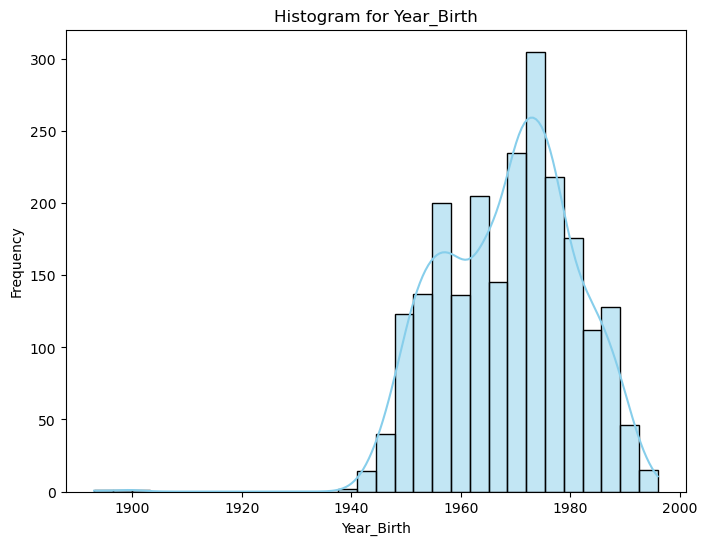

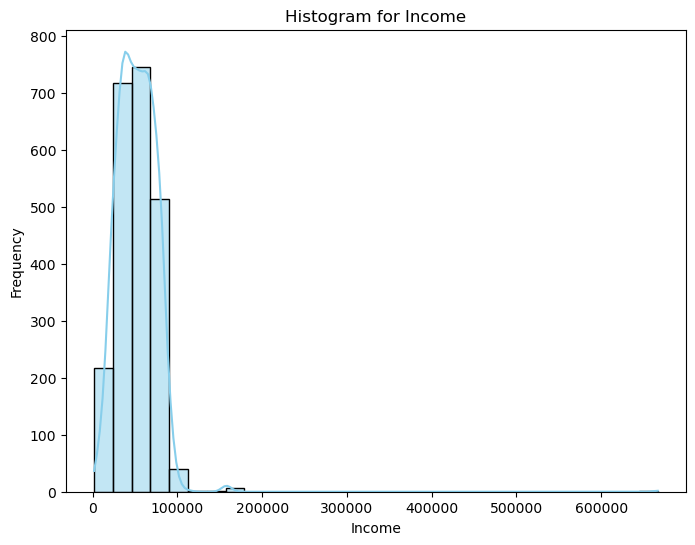

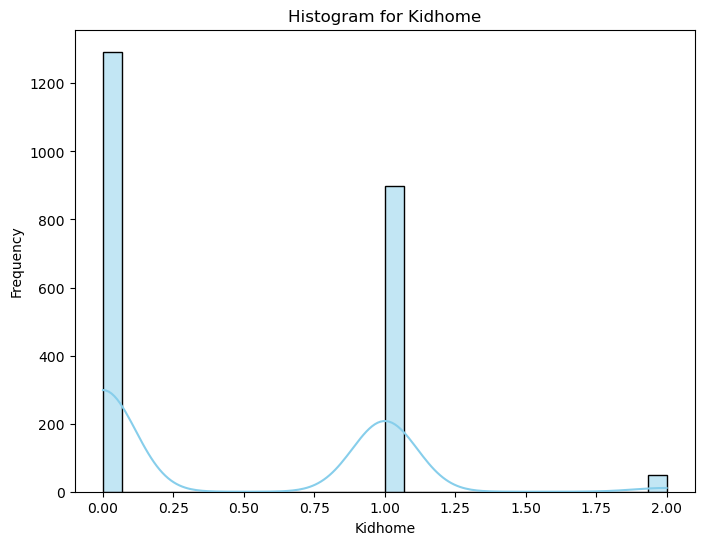

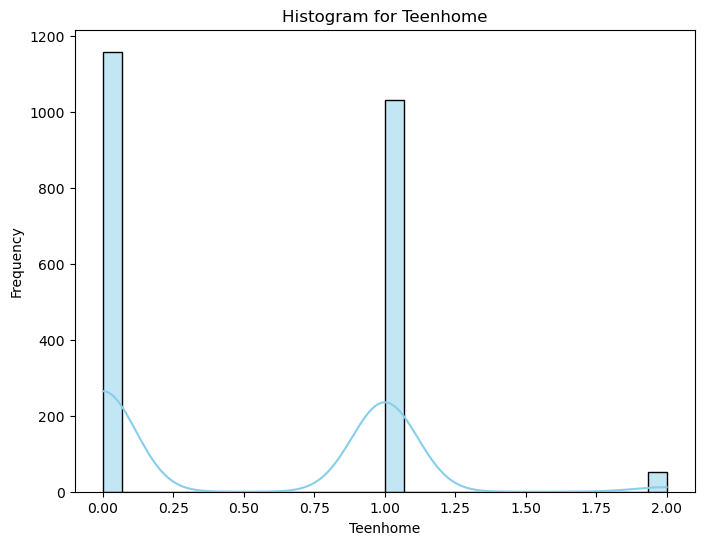

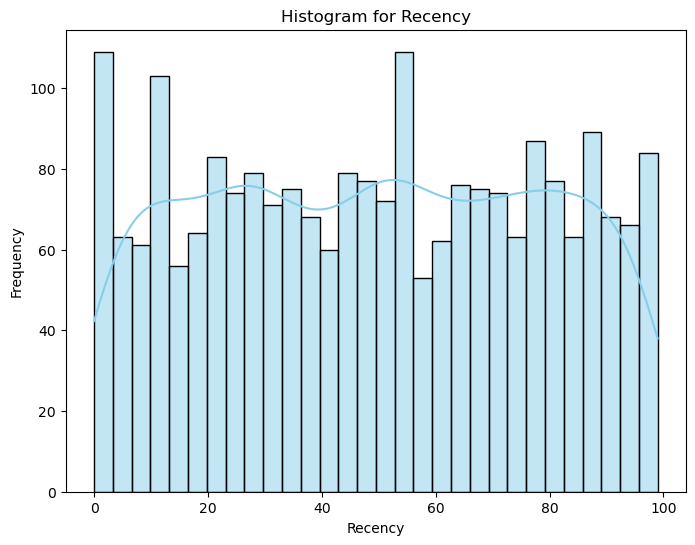

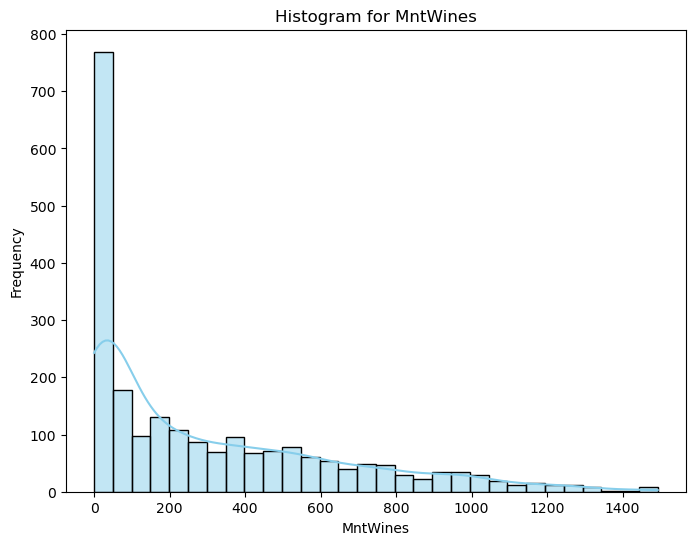

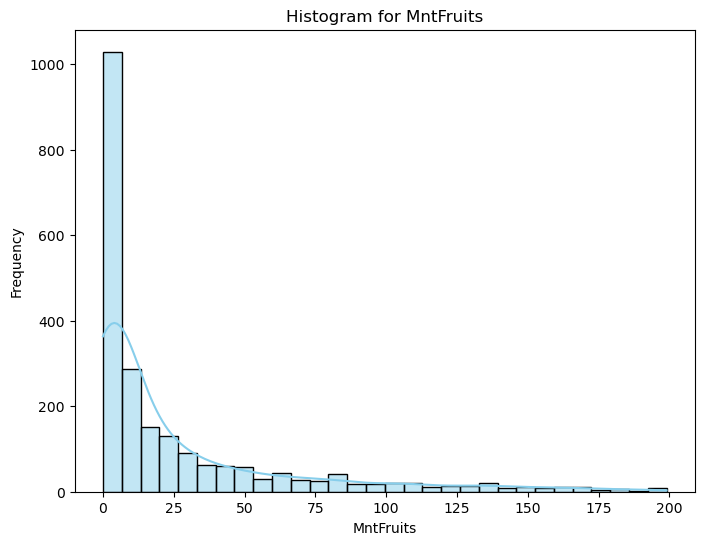

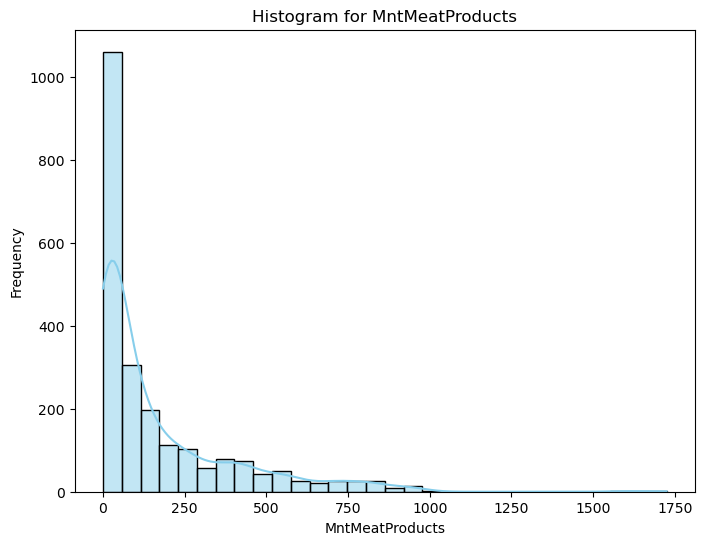

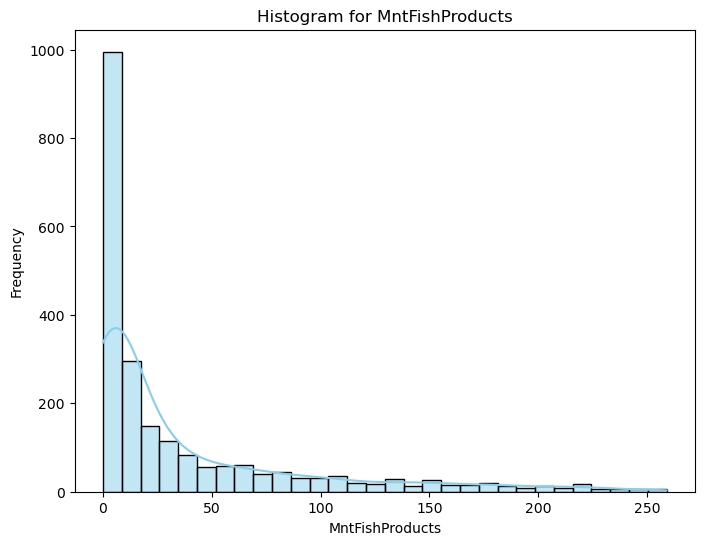

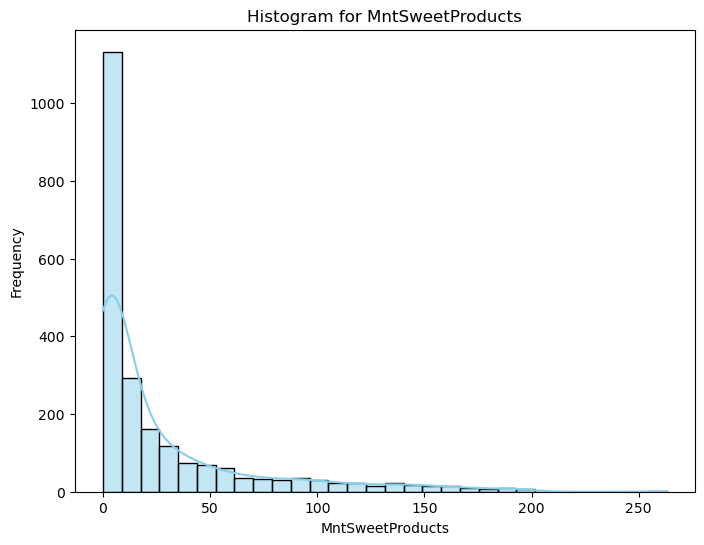

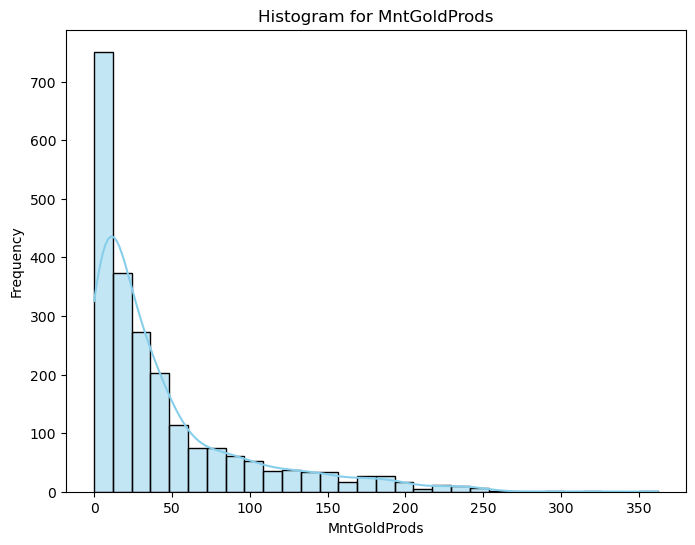

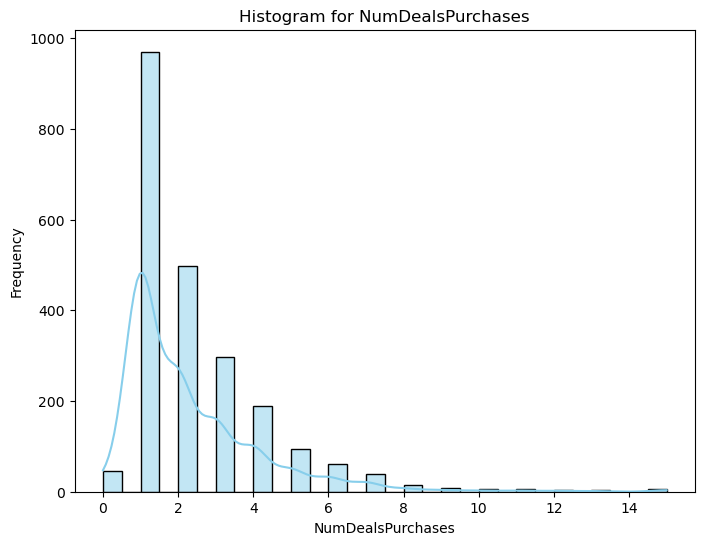

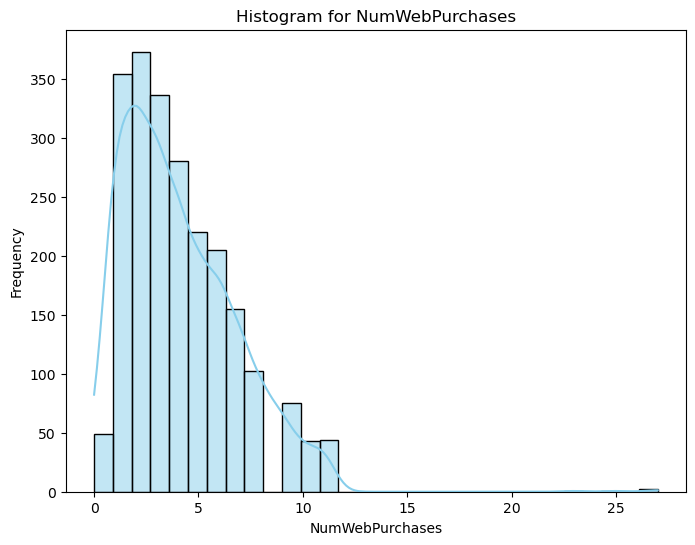

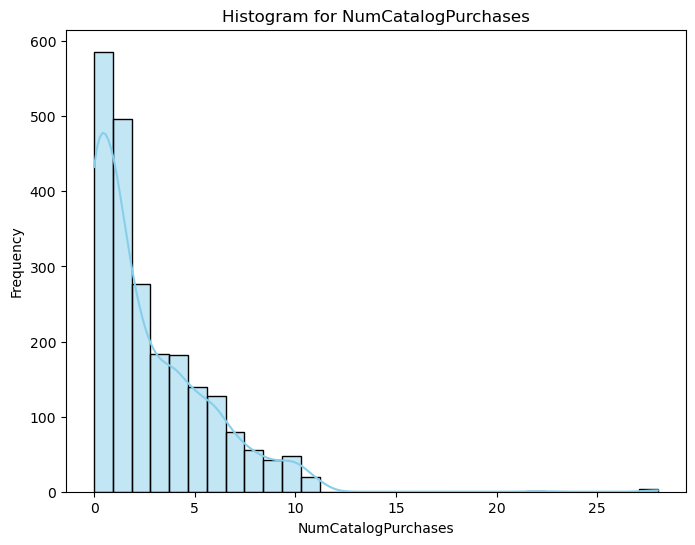

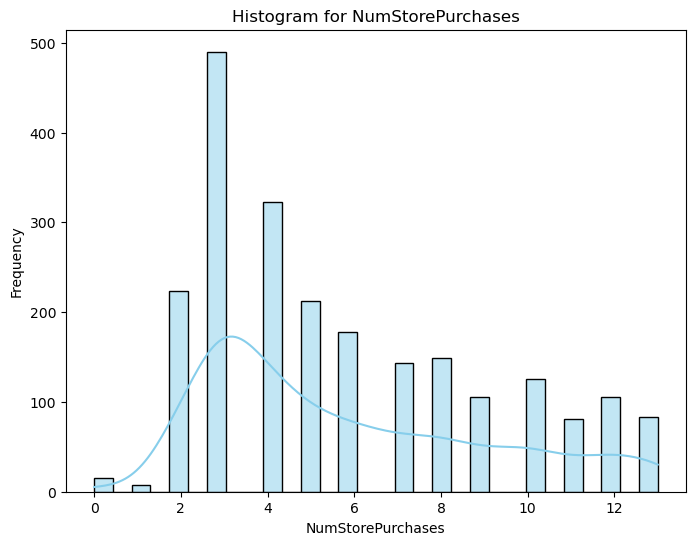

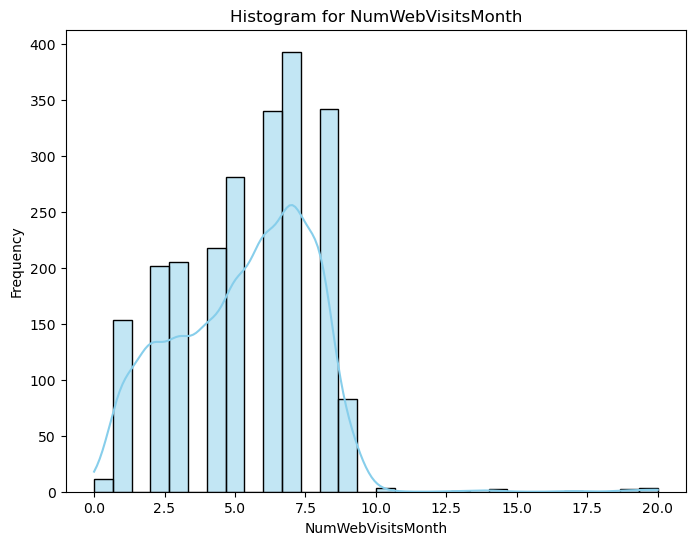

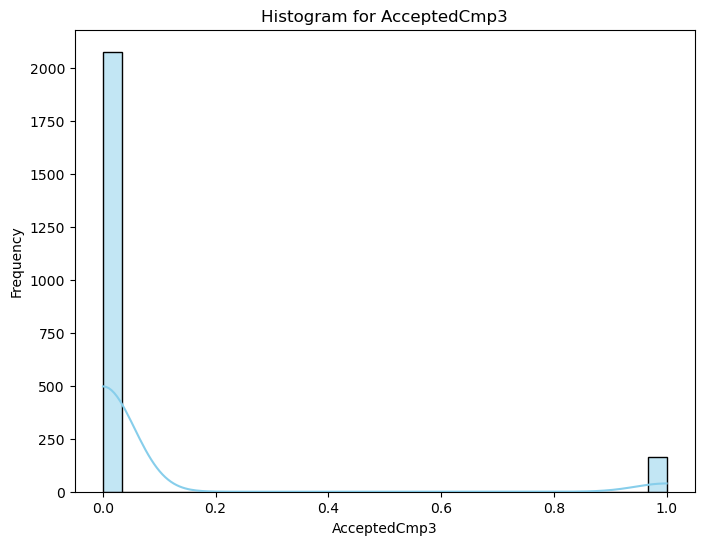

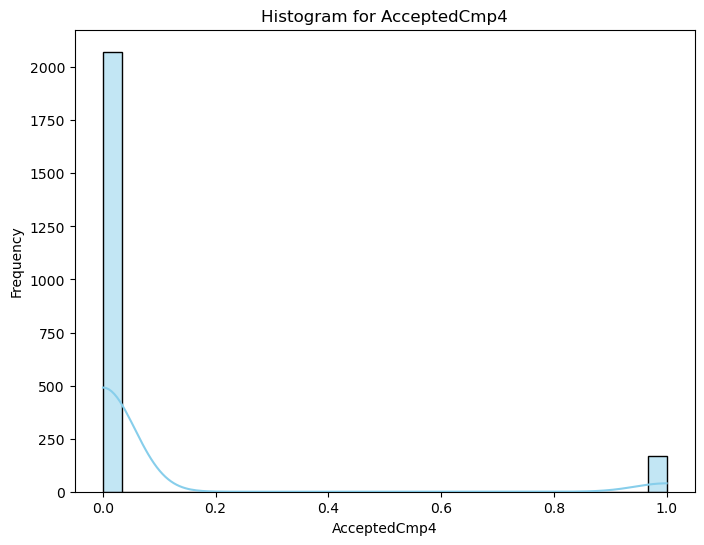

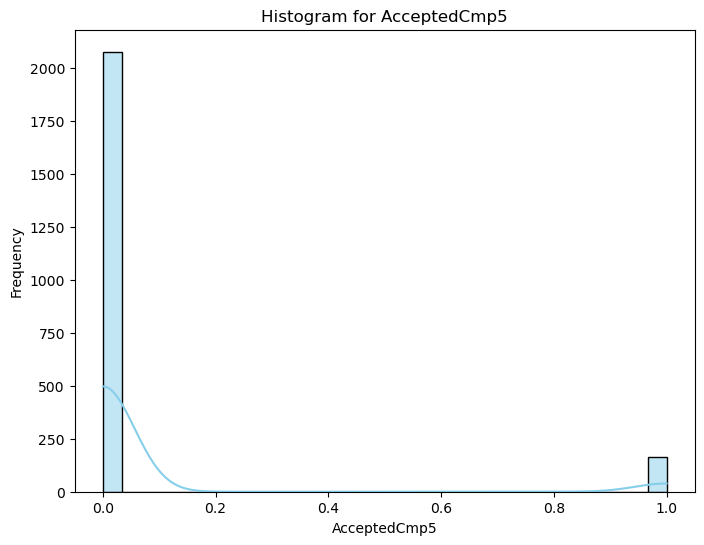

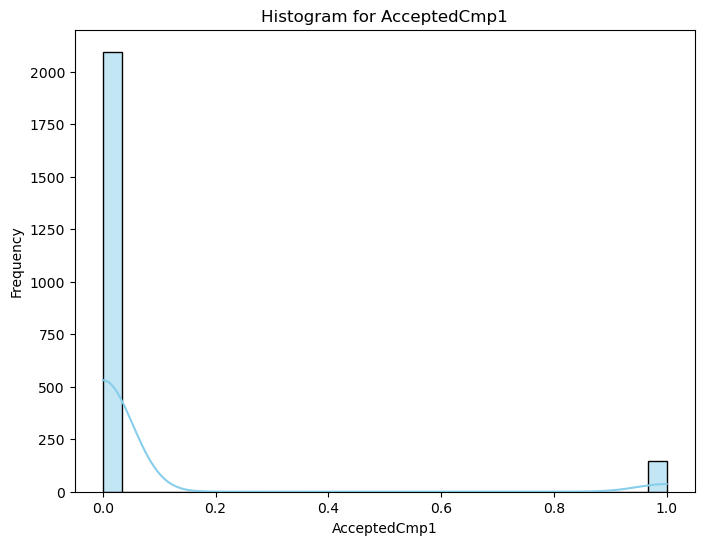

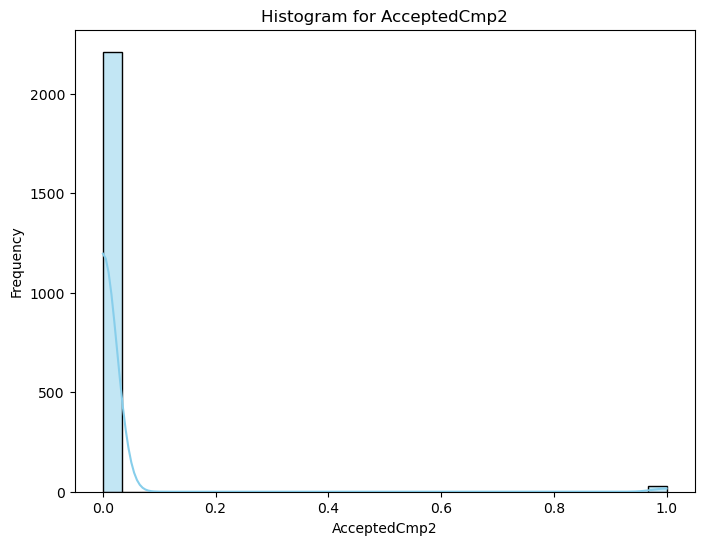

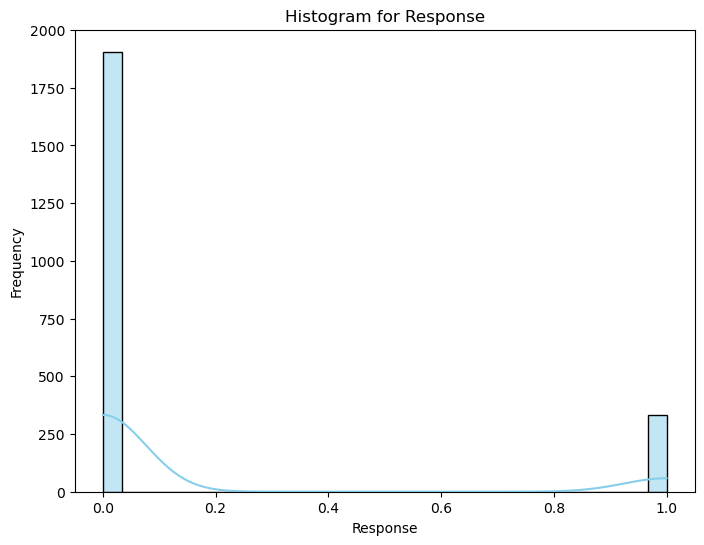

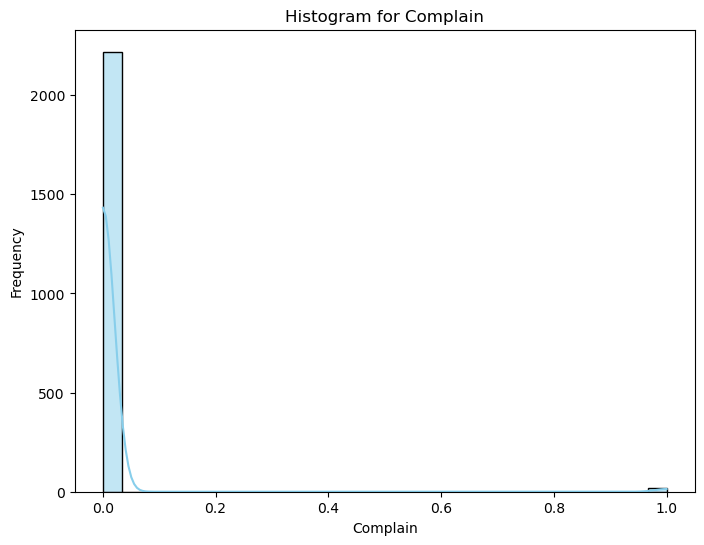

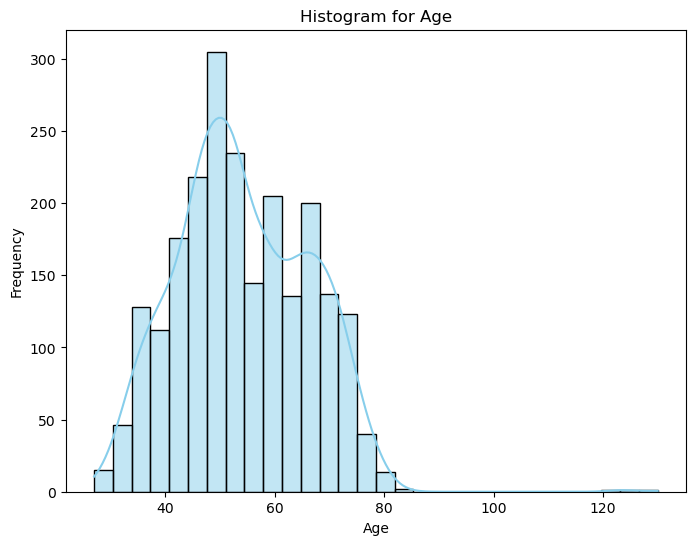

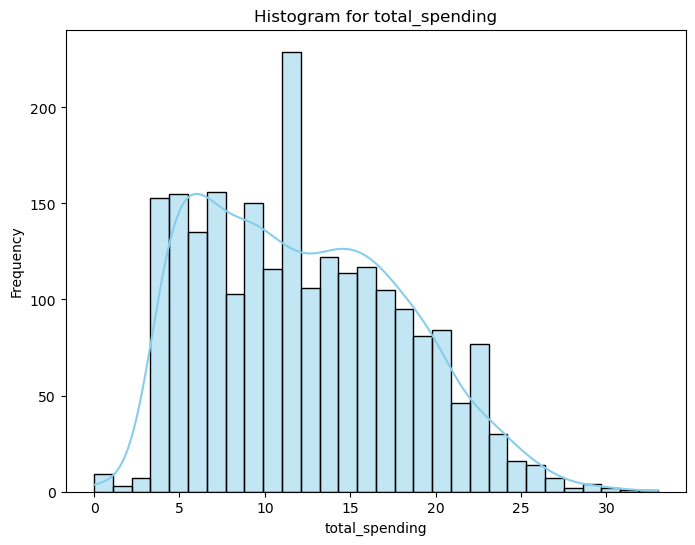

In [40]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, bins=30, color='skyblue')
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


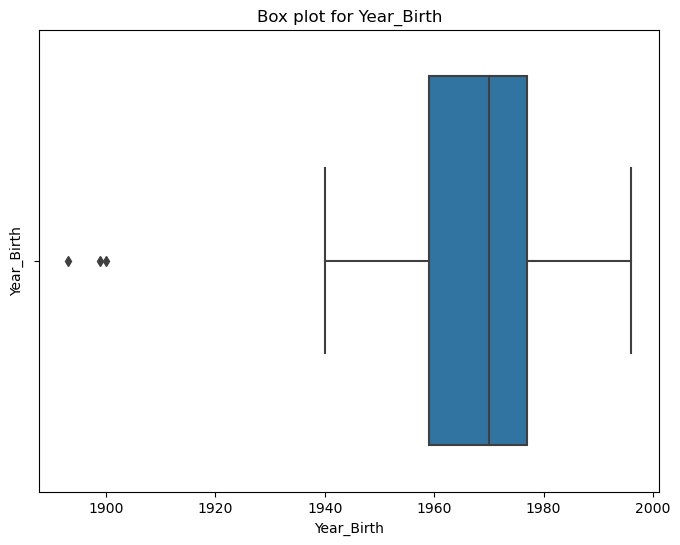

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


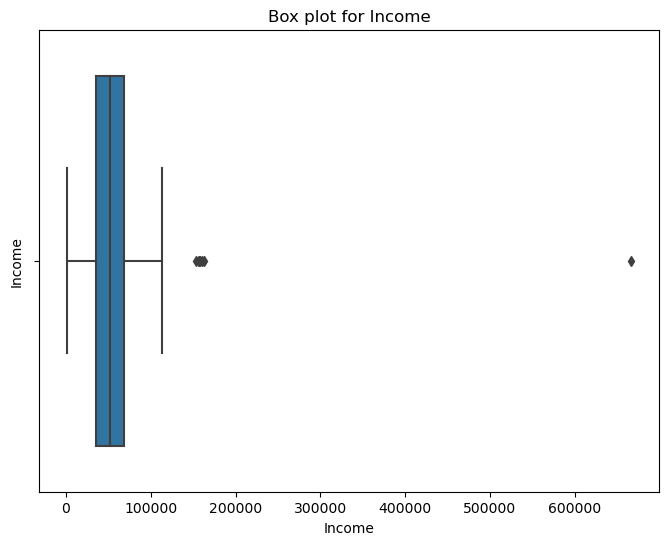

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


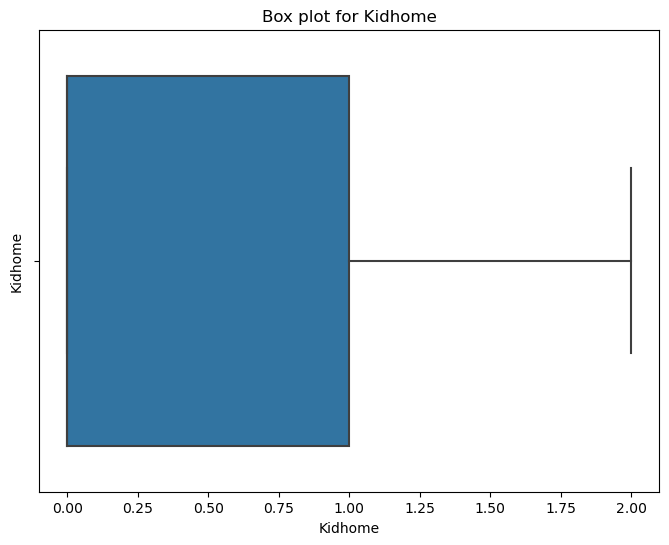

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


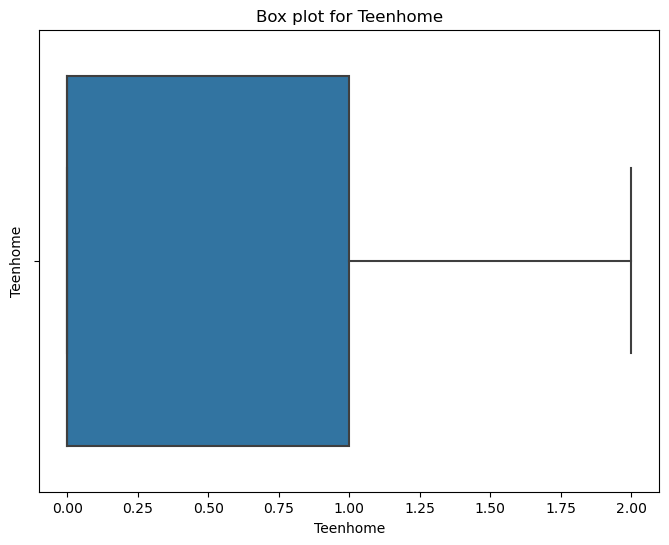

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


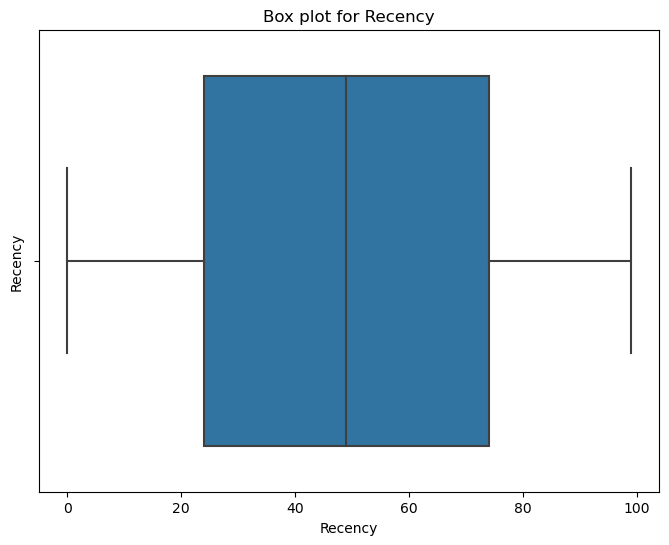

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


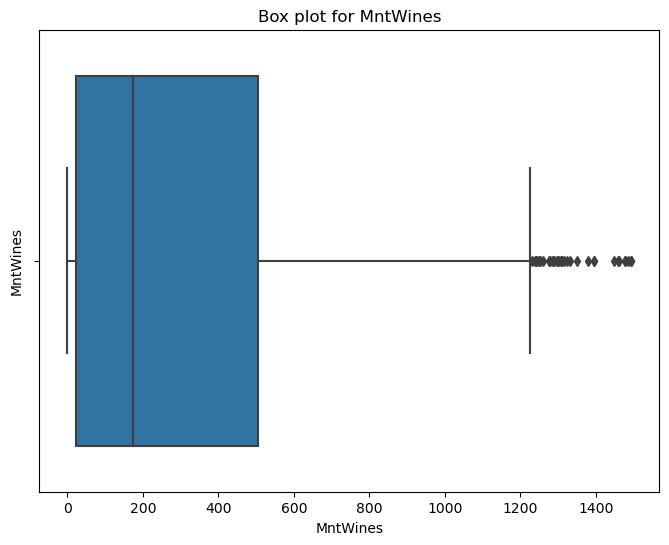

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


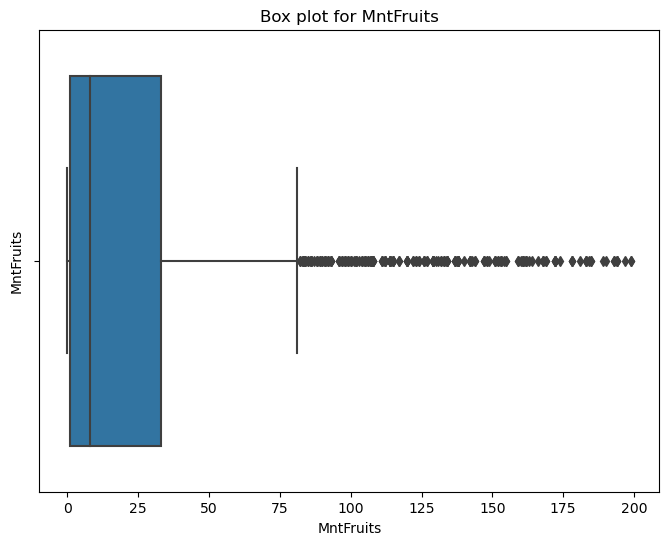

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


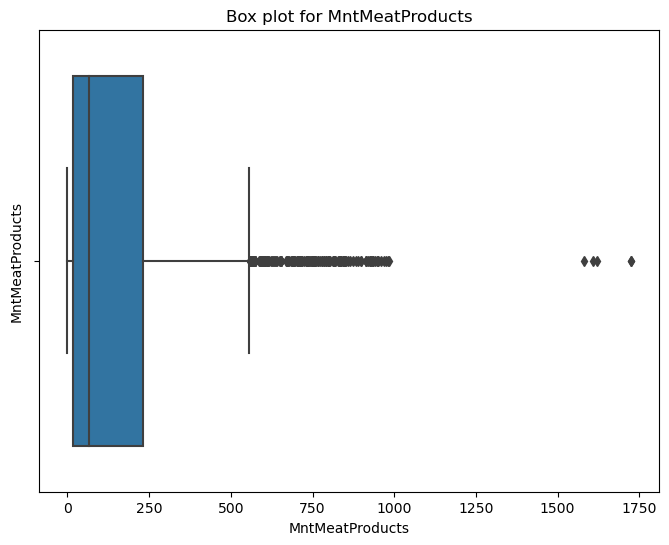

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


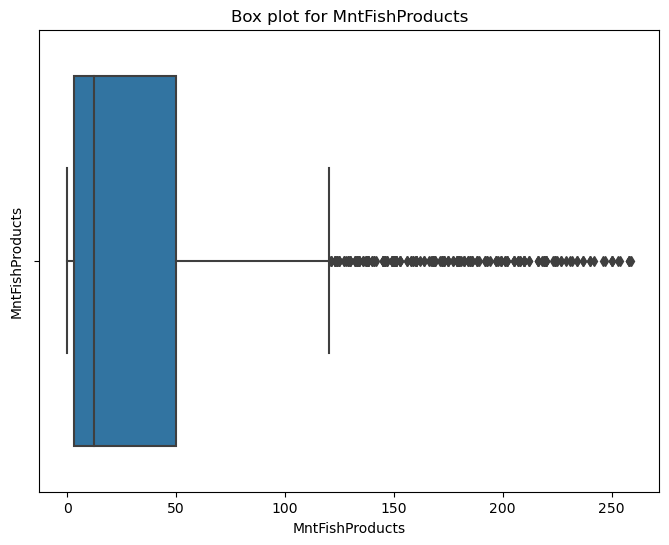

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


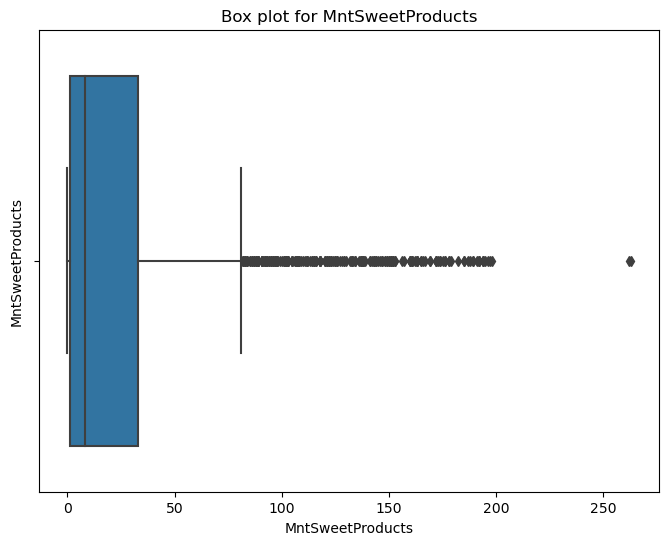

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


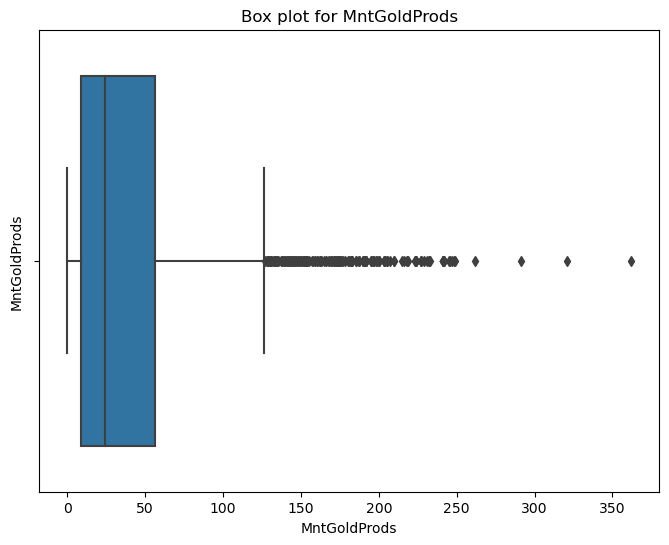

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


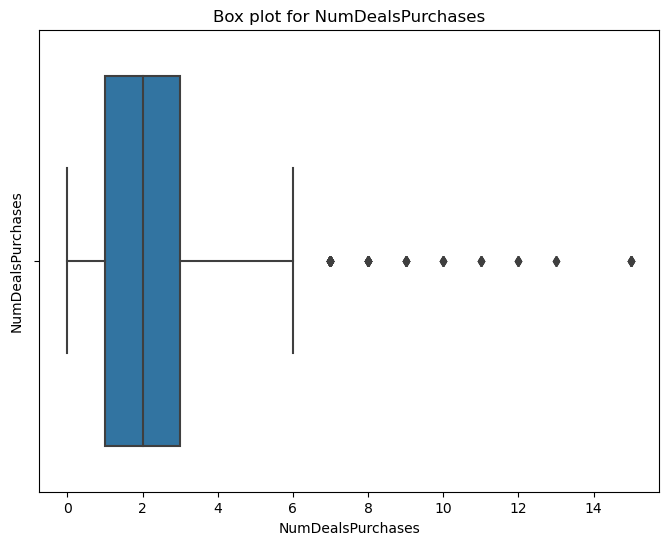

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


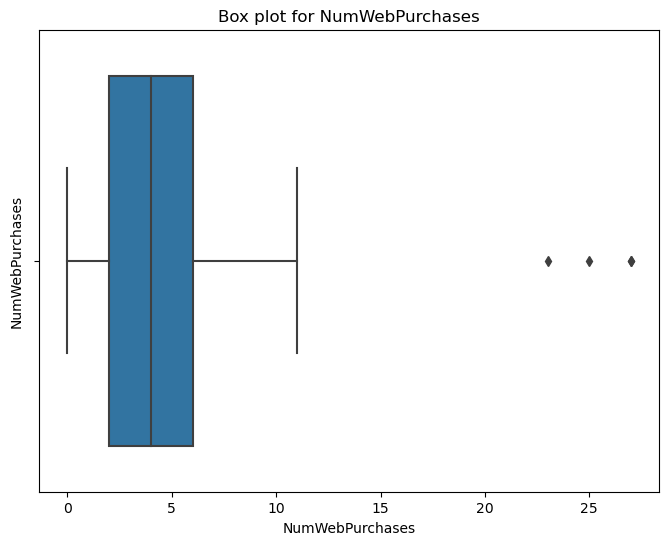

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


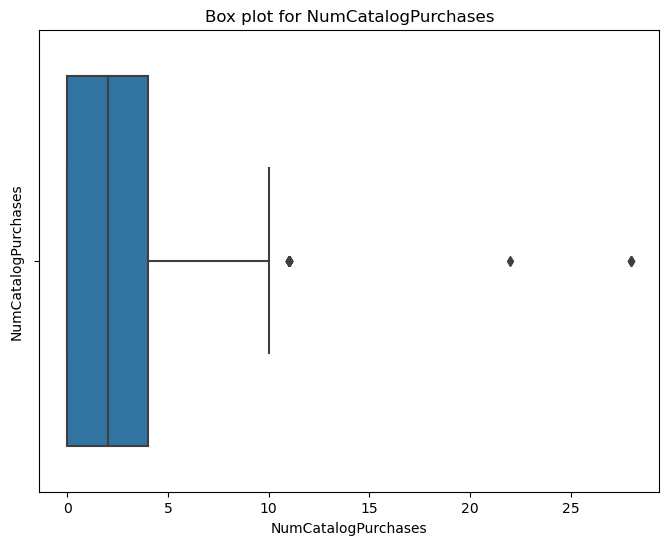

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


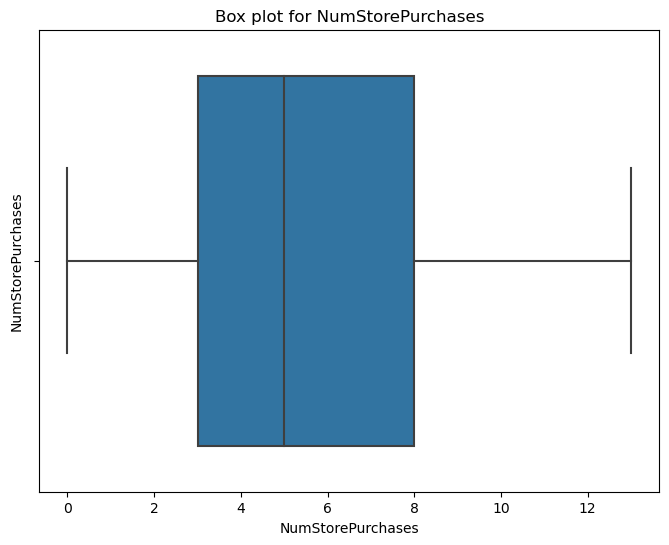

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


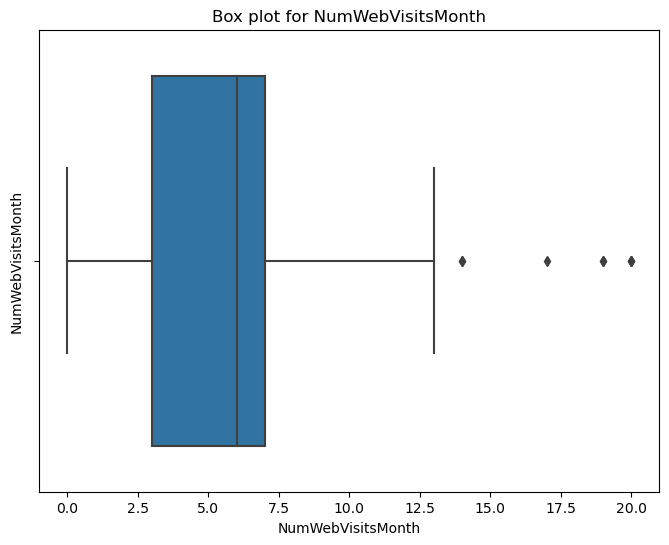

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


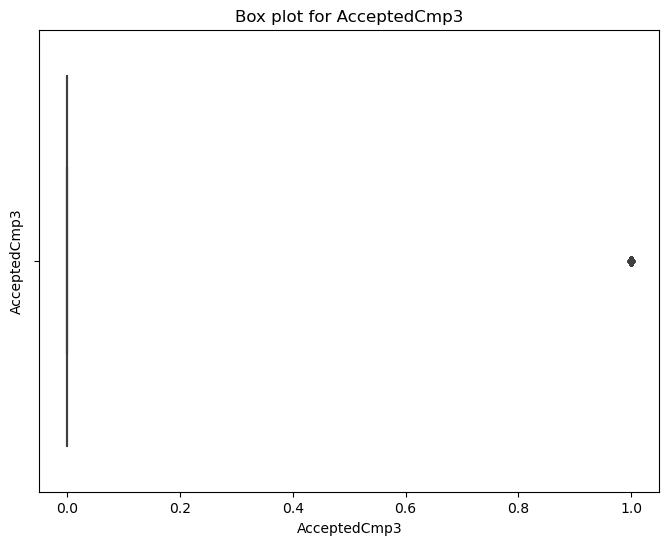

In [172]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column],orient = 'v' )
        plt.title(f'Box plot for {column}')
        plt.ylabel(column)
        plt.show()
        if column.startswith('AcceptedCmp'):
                break

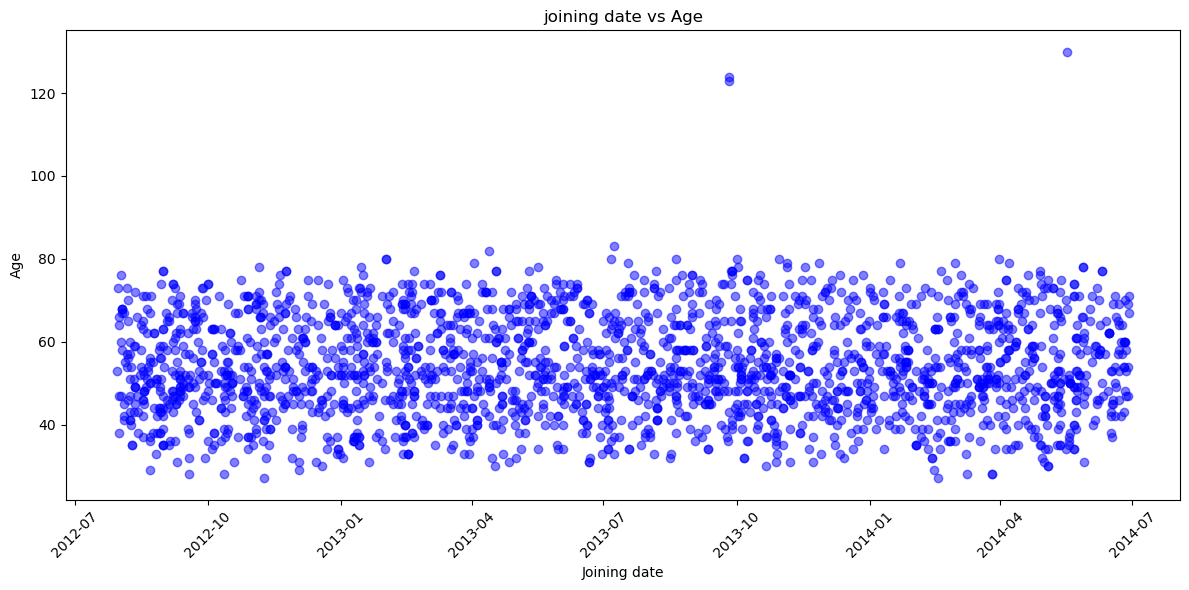

In [174]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Dt_Customer'], df['Age'], color='b', alpha=0.5)
plt.xlabel('Joining date')
plt.ylabel('Age')
plt.title('joining date vs Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [97]:
df['Age'].value_counts().to_frame()


,count
Age,
47,89
52,87
48,83
51,79
53,77
45,77
58,74
50,74
54,71


the theory here are ages might be incorrect error data entry ages are 130,124,123 i might replace those ages with NaN 

Create a heatmap to showcase the correlation between different pairs of variables

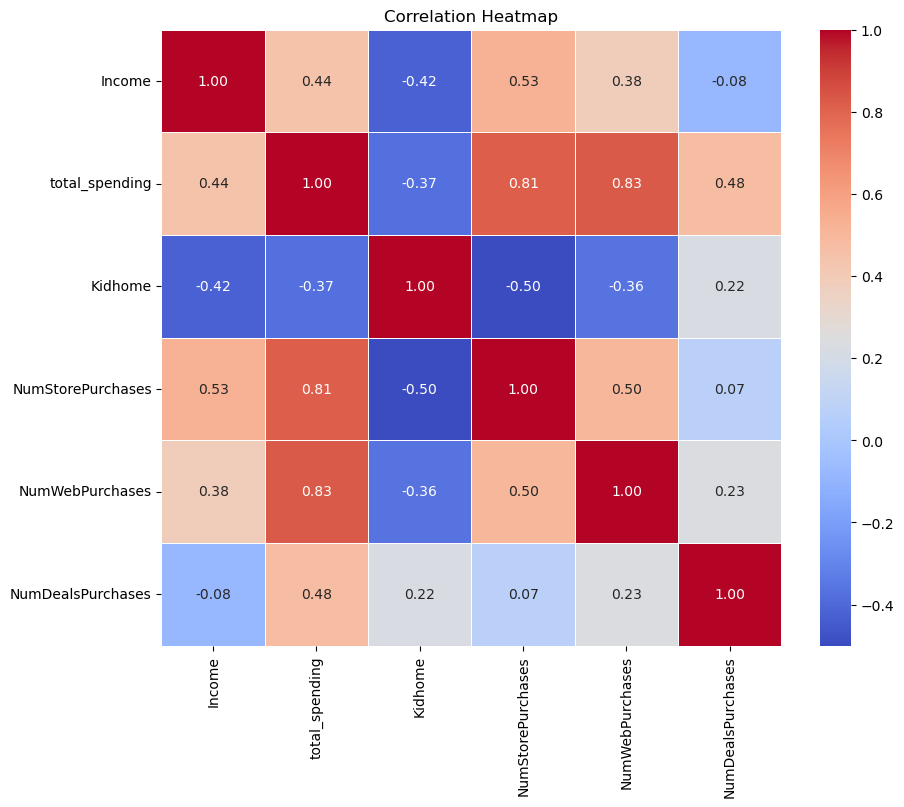

In [110]:
selected_columns = ['Income', 'total_spending','Kidhome','NumStorePurchases','NumWebPurchases','NumDealsPurchases']

subset_df = df[selected_columns]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

I would like to see which channel people are visiting and buying moreoften 

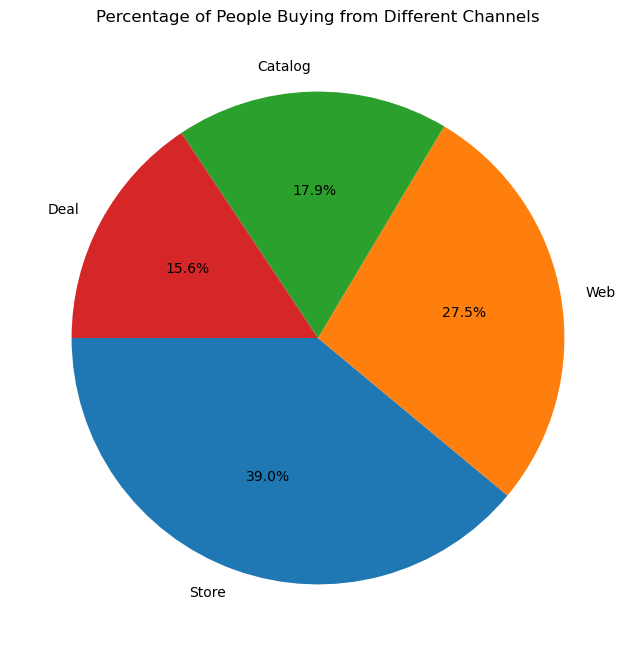

In [180]:

store_purchases_count = df['NumStorePurchases'].sum()
web_purchases_count = df['NumWebPurchases'].sum()
catalog_purchases_count = df['NumCatalogPurchases'].sum()
deal_purchase_count = df['NumDealsPurchases'].sum()

total_purchases = store_purchases_count + web_purchases_count + catalog_purchases_count + deal_purchase_count
store_purchases_percentage = (store_purchases_count / total_purchases) * 100
web_purchases_percentage = (web_purchases_count / total_purchases) * 100
catalog_purchases_percentage = (catalog_purchases_count / total_purchases) * 100
deal_purchase_percentage = (deal_purchase_count/total_purchases) * 100
channels = ['Store', 'Web', 'Catalog','Deal']
percentages = [store_purchases_percentage, web_purchases_percentage, catalog_purchases_percentage,deal_purchase_percentage]

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=channels, autopct='%1.1f%%', startangle=180)
plt.title('Percentage of People Buying from Different Channels')
plt.show()

**Test the following hypotheses**
Older people are not as tech-savvy and probably prefer shopping in-store. 

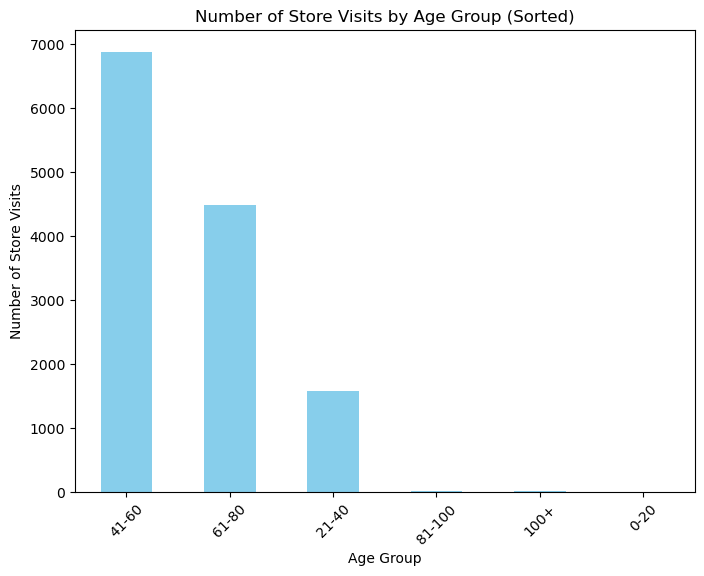

In [121]:
bins = [0, 20, 40, 60, 80, 100, float('inf')]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '100+']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

store_visits_by_age = df.groupby('Age Group')['NumStorePurchases'].sum().sort_values(ascending=False)

# Plot the bar chart with sorted values
plt.figure(figsize=(8, 6))
store_visits_by_age.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Store Visits')
plt.title('Number of Store Visits by Age Group (Sorted)')
plt.xticks(rotation=45)
plt.show()

2.Customers with kids probably have less time to visit a store and would prefer to shop online

<Figure size 800x600 with 0 Axes>

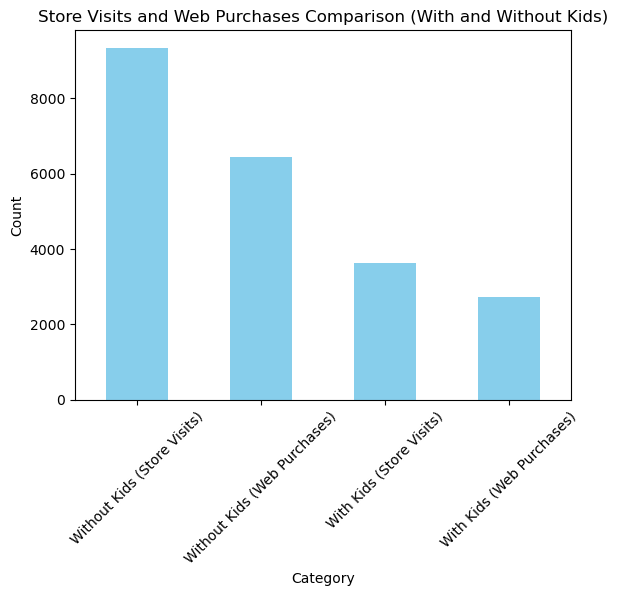

In [124]:

with_kids_store_visits = df[df['Kidhome'] > 0]['NumStorePurchases'].sum()
with_kids_web_purchases = df[df['Kidhome'] > 0]['NumWebPurchases'].sum()
without_kids_store_visits = df[df['Kidhome'] == 0]['NumStorePurchases'].sum()
without_kids_web_purchases = df[df['Kidhome'] == 0]['NumWebPurchases'].sum()

# Create a DataFrame for visualization
data = {
    'Category': ['With Kids (Store Visits)', 'With Kids (Web Purchases)', 'Without Kids (Store Visits)', 'Without Kids (Web Purchases)'],
    'Count': [with_kids_store_visits, with_kids_web_purchases, without_kids_store_visits, without_kids_web_purchases]
}
visits_df = pd.DataFrame(data)

# Plot the bar chart in descending order
plt.figure(figsize=(8, 6))
visits_df.sort_values(by='Count', ascending=False).plot(kind='bar', x='Category', y='Count', legend=None, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Store Visits and Web Purchases Comparison (With and Without Kids)')
plt.xticks(rotation=45)
plt.show()

Does the US fare significantly better than the rest of the world in terms of total purchases?
 

There is no significant difference in total purchases between the US and the rest of the world.


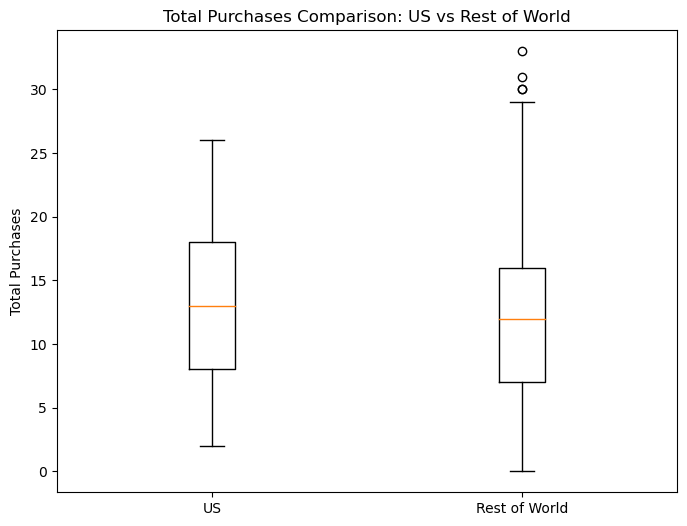

In [127]:
from scipy.stats import ttest_ind

us_purchases = df[df['Country'] == 'US']['total_spending']
rest_of_world_purchases = df[df['Country'] != 'US']['total_spending']

# Perform t-test to compare means
t_stat, p_value = ttest_ind(us_purchases, rest_of_world_purchases)

# Define significance level (alpha)
alpha = 0.05

# Print the results
if p_value < alpha:
    print("The US fares significantly better than the rest of the world in terms of total purchases.")
else:
    print("There is no significant difference in total purchases between the US and the rest of the world.")
plt.figure(figsize=(8, 6))
plt.boxplot([us_purchases, rest_of_world_purchases], labels=['US', 'Rest of World'])
plt.ylabel('Total Purchases')
plt.title('Total Purchases Comparison: US vs Rest of World')
plt.show()


Which products are performing the best, and which are performing the least in terms of revenue? 

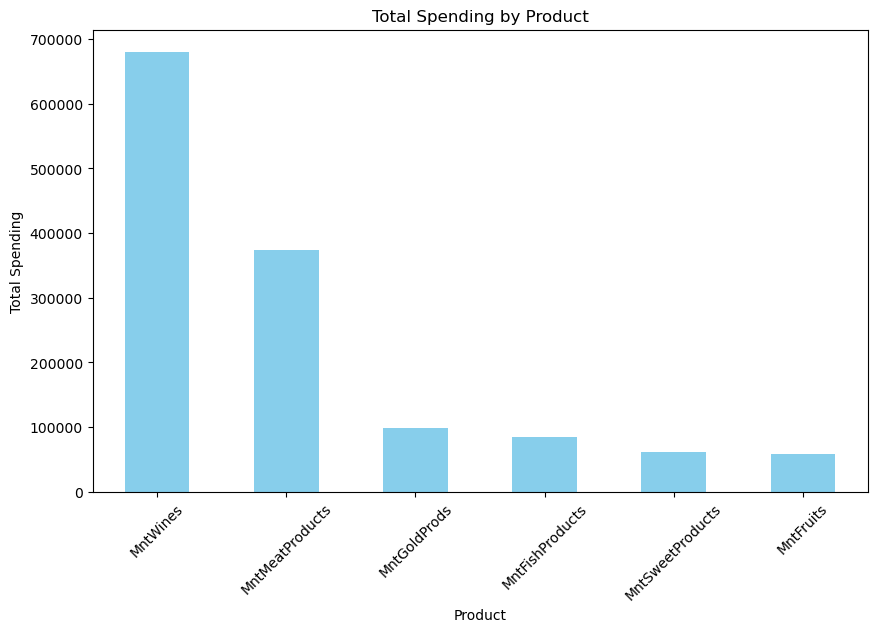

The product with the most revenue is: MntWines
The product with the least revenue is: MntFruits


In [139]:
# List of products to analyze
products_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total spending for each product and sort products by revenue
product_revenue = df[products_columns].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Spending')
plt.title('Total Spending by Product')
plt.xticks(rotation=45)
plt.show()

# Product with the most revenue
best_product = product_revenue.idxmax()
# Product with the least revenue
least_product = product_revenue.idxmin()

print(f"The product with the most revenue is: {best_product}")
print(f"The product with the least revenue is: {least_product}")

Is there any pattern between the age of customers and the last campaign acceptance rate? 

In [147]:
schema_df.loc['Response','Description']

'1 if the customer accepted the offer in the last campaign, 0 otherwise'

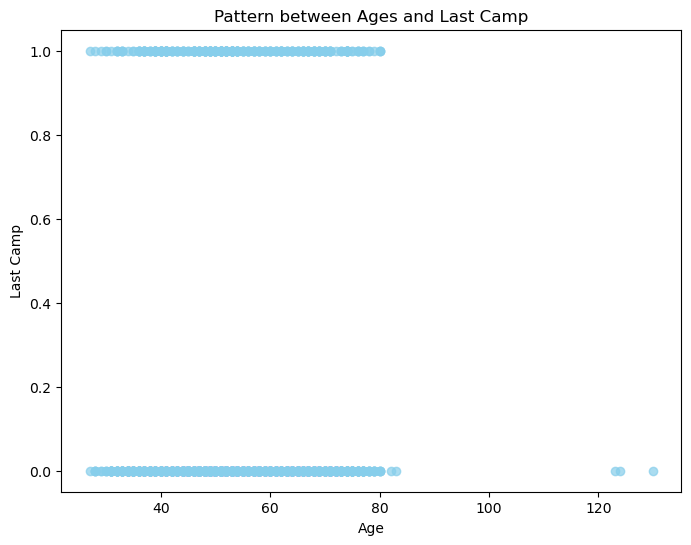

In [148]:

plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Response'], color='skyblue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Last Camp')
plt.title('Pattern between Ages and Last Camp')
plt.show()

Which Country has the greatest number of customers who accepted the last campaign? 

In [159]:
accepted_responses_by_country = df[df['Response'] == 1].groupby('Country')['Response'].count()
country_with_most_accepted_responses = accepted_responses_by_country.idxmax()

print(f"The country with the most accepted responses is: {country_with_most_accepted_responses}")
print(f"Number of accepted responses in {country_with_most_accepted_responses}: {accepted_responses_by_country.max()}")



The country with the most accepted responses is: SP
Number of accepted responses in SP: 176


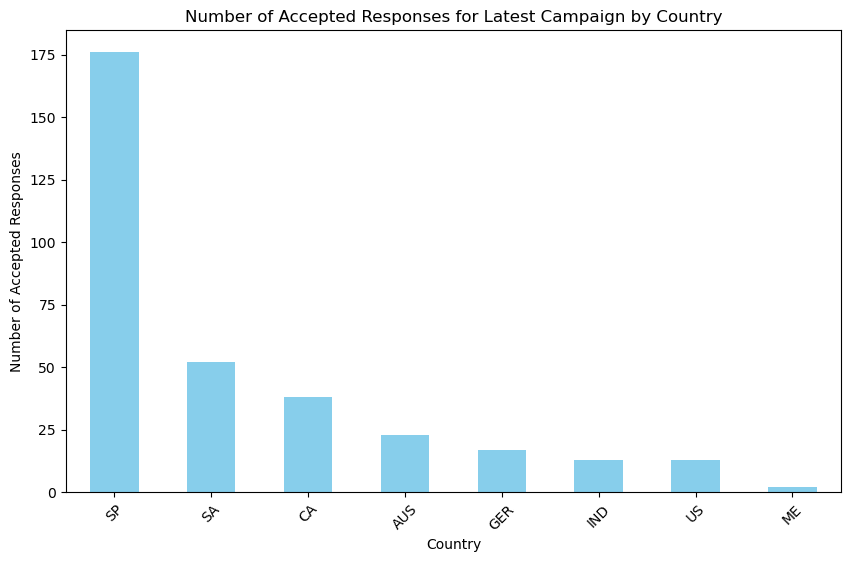

The country with the most accepted responses is: SP
Number of accepted responses in SP: 176


In [162]:

accepted_responses_by_country = df[df['Response'] == 1].groupby('Country')['Response'].count()
accepted_responses_by_country_sort=accepted_responses_by_country.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
accepted_responses_by_country_sort.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Accepted Responses')
plt.title('Number of Accepted Responses for Latest Campaign by Country')
plt.xticks(rotation=45)
plt.show()

country_with_most_accepted_responses = accepted_responses_by_country.idxmax()
max_accepted_responses = accepted_responses_by_country.max()

print(f"The country with the most accepted responses is: {country_with_most_accepted_responses}")
print(f"Number of accepted responses in {country_with_most_accepted_responses}: {max_accepted_responses}")

Do you see any pattern in the no. of children at home and total spend? 

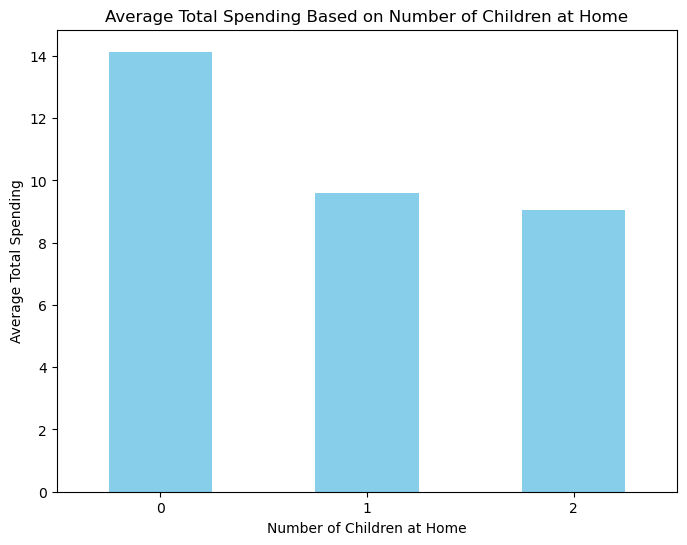

In [169]:

average_spending_by_children = df.groupby('Kidhome')['total_spending'].mean()

plt.figure(figsize=(8, 6))
average_spending_by_children.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Children at Home')
plt.ylabel('Average Total Spending')
plt.title('Average Total Spending Based on Number of Children at Home')
plt.xticks(rotation=0)
plt.show()

Education background of the customers who complained in the last 2 years. 

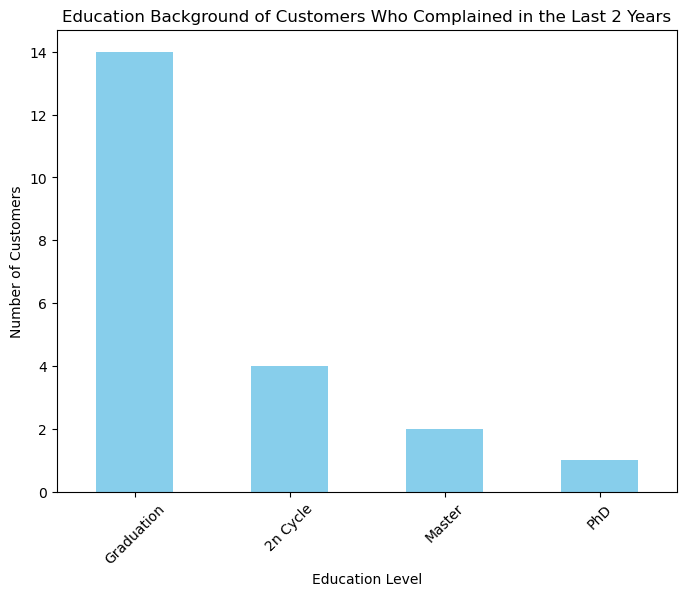

In [170]:
complained_customers = df[df['Complain'] == 1]

education_counts = complained_customers['Education'].value_counts()

plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Education Background of Customers Who Complained in the Last 2 Years')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()